In [2]:
# -*- coding: utf-8 -*-
%matplotlib inline
#import datetime
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import re,math
import pandas as pd
from math import isnan
import gc

In [4]:
pop=pd.read_csv('../data/user_log.csv',sep='|')

In [5]:
pop.head()

,uid,action,jobNo,invoice,dateTime,source,url,deviceType
0,1245540518330,viewJob,8338295.0,43125162,2016-07-20 16:59:36,app,NaN,1.0
1,1245540518330,viewJob,8338295.0,43125162,2016-07-08 01:04:27,app,NaN,1.0
2,1245540518330,applyJob,8338295.0,43125162,NaN,app,NaN,0.0
3,1245540518330,viewJob,5117491.0,22662550,2016-07-20 12:26:29,app,NaN,1.0
4,1245540518330,applyJob,5117491.0,22662550,NaN,app,NaN,0.0


In [8]:
def time_format_m(x):
    if  type(x)!=float:
        return datetime.strptime(x,'%Y-%m-%d %H:%M:%S').month
def time_format_h(x):
    if  type(x)!=float:
        return datetime.strptime(x,'%Y-%m-%d %H:%M:%S').hour 
def time_format_W(x):
    if  type(x)!=float:
        return datetime.strptime(x,'%Y-%m-%d %H:%M:%S').isocalendar()[1]
def time_format_w(x):
    if  type(x)!=float:
        return datetime.strptime(x,'%Y-%m-%d %H:%M:%S').weekday()

In [9]:
#新增時間欄位
pop['month']=pop['dateTime'].apply(time_format_m)
pop['hour']=pop['dateTime'].apply(time_format_h)
pop['week']=pop['dateTime'].apply(time_format_W)
pop['weekday']=pop['dateTime'].apply(time_format_w)

In [20]:
count_action=pop[['uid','action']].groupby('action').count()
count_action

,uid
action,
applyJob,8193074
saveJob,3178404
viewCust,24207082
viewJob,64269330


In [10]:
#每月不重複人數
count_month_people=pop[['uid','month']].groupby('month')['uid'].nunique()
count_month_people

month
1.0     367936
2.0     425997
3.0     432888
4.0     336601
5.0     309383
6.0     322896
7.0     414359
8.0     417826
9.0     379139
10.0    385258
11.0    363131
12.0    356360
Name: uid, dtype: int64

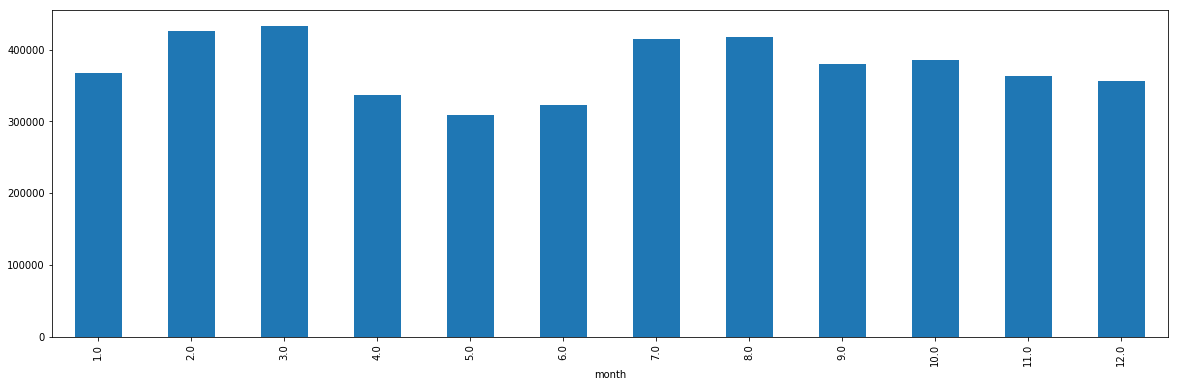

In [11]:
#每月不重複人數(統計圖)
plt_count_month_people=count_month_people.plot(kind='bar',figsize=(20,6))

In [12]:
#每個小時觀看數量
count_hour=pop[['uid','hour']].groupby('hour').count()
count_hour

,uid
hour,
0.0,3136343
1.0,2307085
2.0,1450386
3.0,864778
4.0,564445
5.0,473623
6.0,695178
7.0,1395904
8.0,2443321


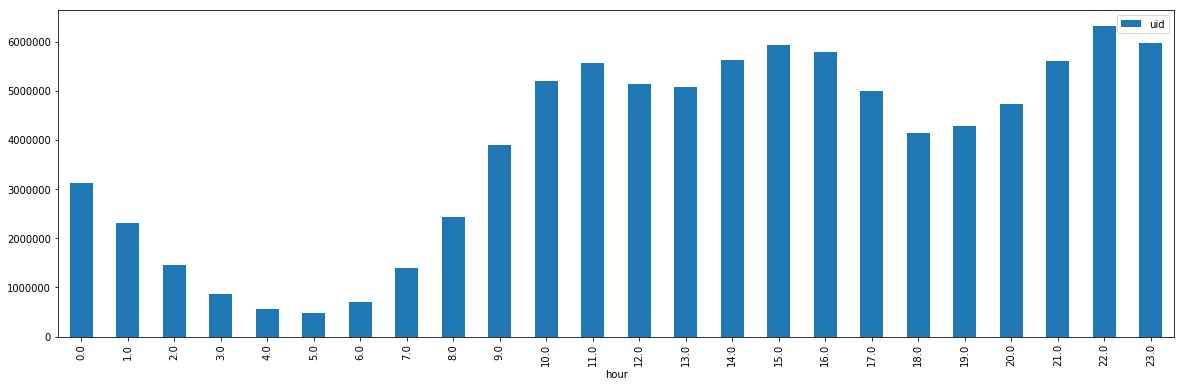

In [13]:
#每個小時觀看數量(統計圖)
pltcount_hour=count_hour.plot(kind='bar',figsize=(20,6))

In [25]:
#篩選有應徵人的紀錄
apply_pop=pop[pop['action']=='applyJob']
notapply_pop=pop[pop['action']!='applyJob']
print len(apply_pop)
print len(notapply_pop)

8193074
91654816


In [33]:
apply_pop_dis=apply_pop[['uid','jobNo']].drop_duplicates()

In [39]:
notapply_pop=notapply_pop.drop(['invoice', 'source', 'url', 'deviceType'],axis=1)

In [41]:
apply_temp=pd.merge(notapply_pop,apply_pop_dis,how='left',on=['uid','jobNo'],indicator=True)

In [44]:
apply_r=apply_temp[apply_temp['_merge']=='both']
apply_n=apply_temp[apply_temp['_merge']=='left_only']
print len(apply_r)
print len(apply_n)

21953550
69701266


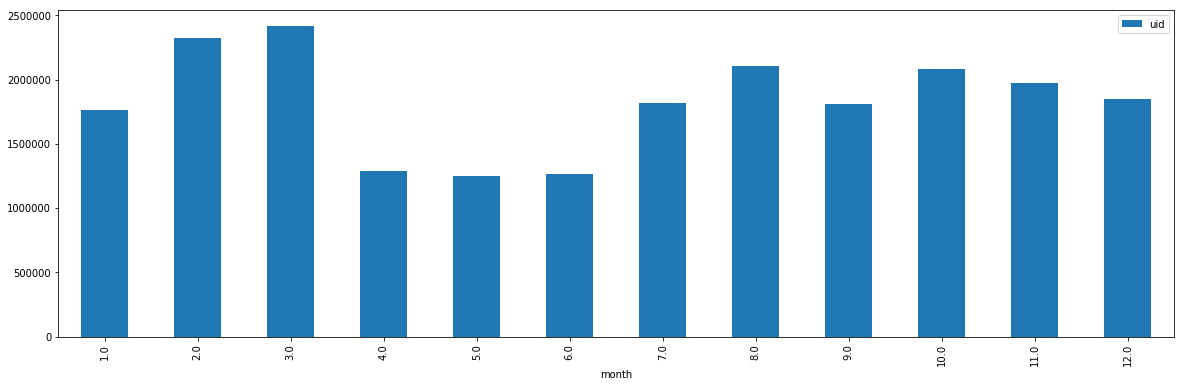

In [45]:
apply_count_month_people=apply_r[['uid','month']].groupby('month').count()
apply_plt_count_month_people=apply_count_month_people.plot(kind='bar',figsize=(20,6))

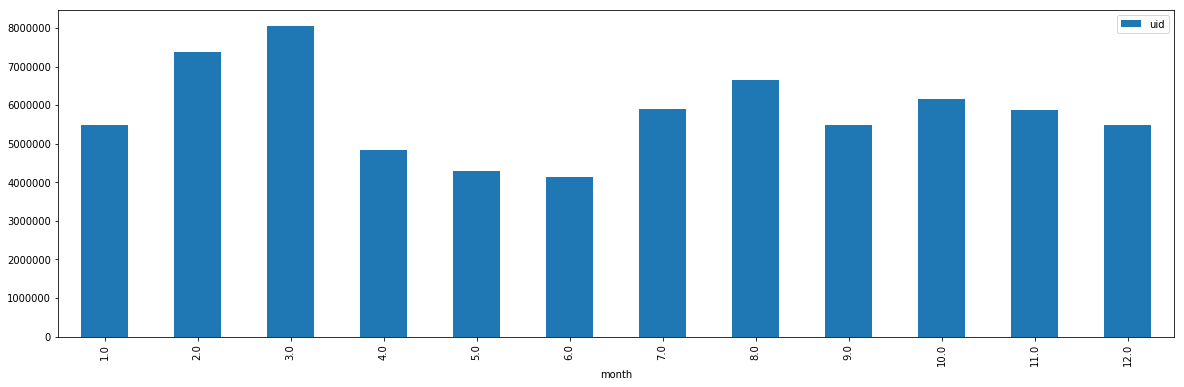

In [46]:

apply_count_month_people=apply_n[['uid','month']].groupby('month').count()
apply_plt_count_month_people=apply_count_month_people.plot(kind='bar',figsize=(20,6))

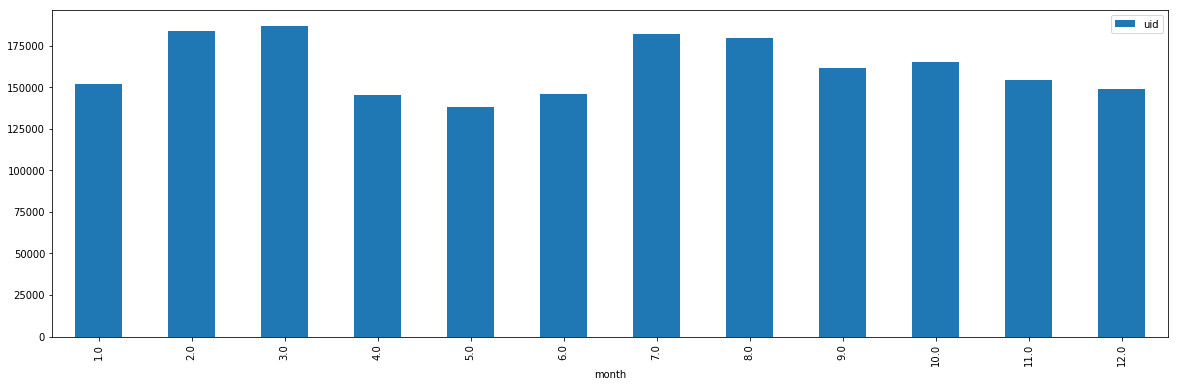

In [58]:
apply_r_p=apply_r[['uid','month']].drop_duplicates()
apply_r_p_c=apply_r_p.groupby('month').count()
apply_plt_count_month_people=apply_r_p_c.plot(kind='bar',figsize=(20,6))

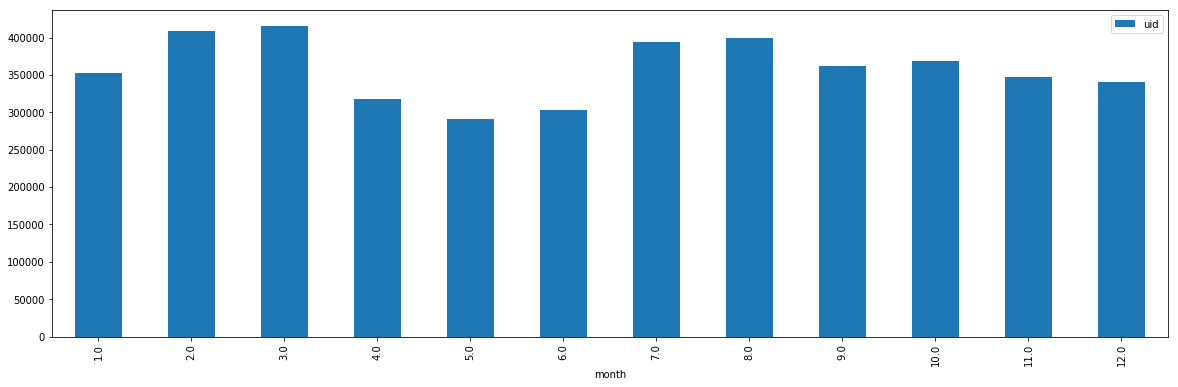

In [52]:
apply_n_p=apply_n[['uid','month']].drop_duplicates()
apply_n_p_c=apply_n_p.groupby('month').count()
apply_plt_count_month_people_n=apply_n_p_c.plot(kind='bar',figsize=(20,6))

(0.28, 0.34)

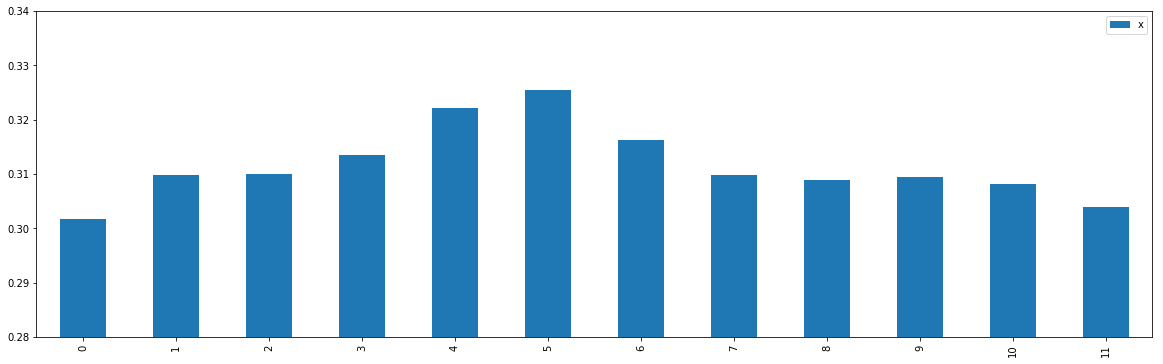

In [93]:
A=apply_r_p_c['uid'].reset_index()
B=apply_n_p_c['uid'].reset_index()
month_percent=pd.merge(A,B,how='left',on='month')
month_percent['total']=month_percent['uid_x']+month_percent['uid_y']
month_percent['x']=month_percent['uid_x']/month_percent['total']
picture=month_percent[['x']].plot(kind='bar',figsize=(20,6))
#應徵總人數/(應徵總人數+非應徵總人數)
plt.ylim(0.28,0.34)

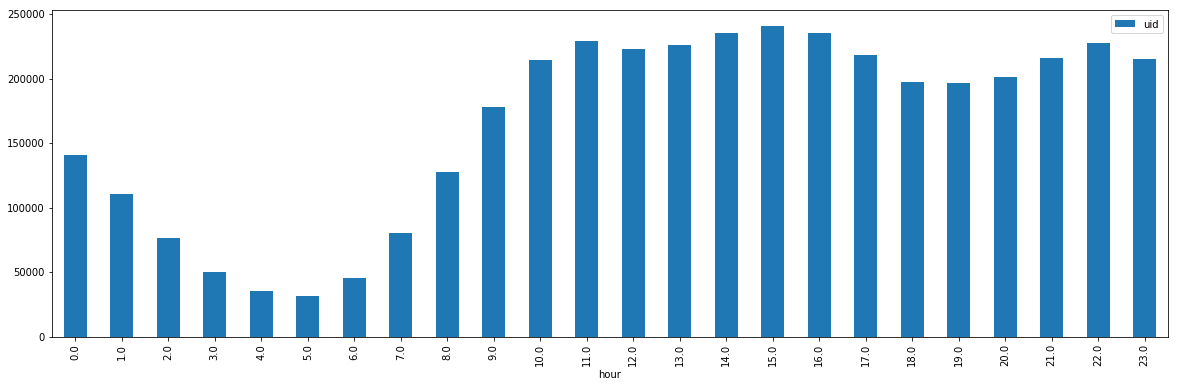

In [94]:
apply_r_p_h=apply_r[['uid','hour']].drop_duplicates()
apply_r_p_c_h=apply_r_p_h.groupby('hour').count()
apply_r_p_c_h_plt=apply_r_p_c_h.plot(kind='bar',figsize=(20,6))

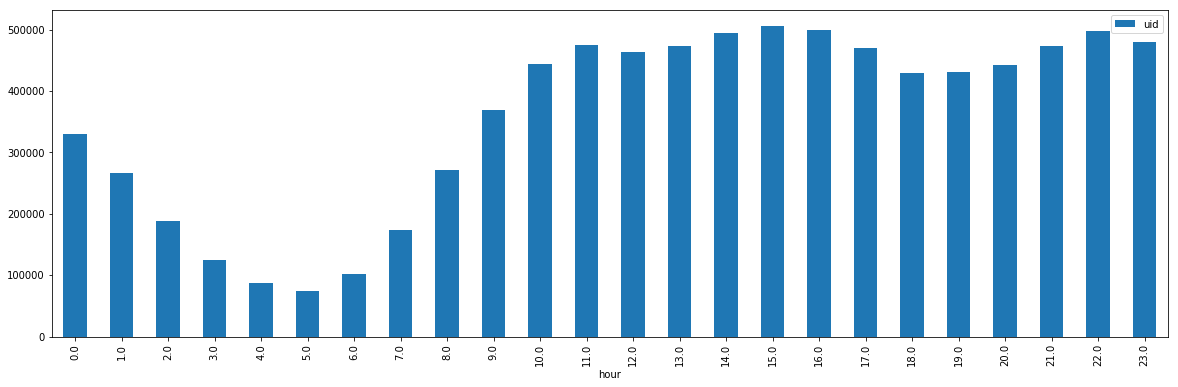

In [95]:
apply_n_p_h=apply_n[['uid','hour']].drop_duplicates()
apply_n_p_c_h=apply_n_p_h.groupby('hour').count()
apply_n_p_c_h_plt=apply_n_p_c_h.plot(kind='bar',figsize=(20,6))

(0.28, 0.34)

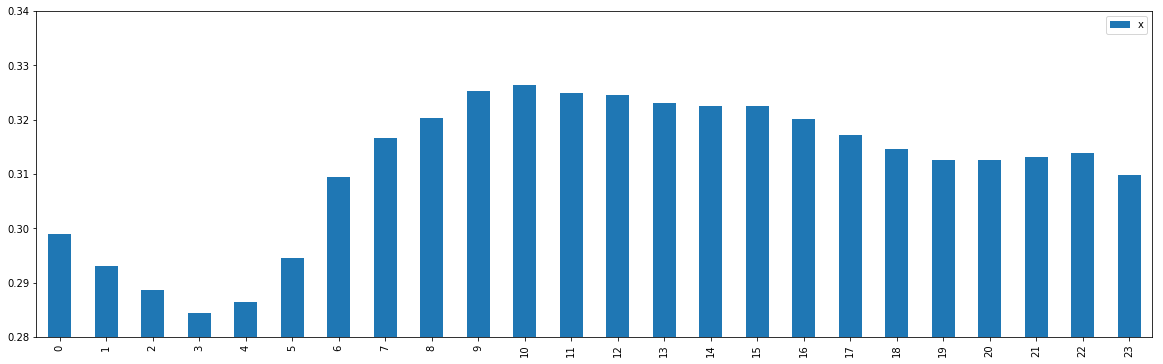

In [99]:
A=apply_r_p_c_h['uid'].reset_index()
B=apply_n_p_c_h['uid'].reset_index()
month_percent=pd.merge(A,B,how='left',on='hour')
month_percent['total']=month_percent['uid_x']+month_percent['uid_y']
month_percent['x']=month_percent['uid_x']/month_percent['total']
picture_hour=month_percent[['x']].plot(kind='bar',figsize=(20,6))
#應徵總人數/(應徵總人數+非應徵總人數)
plt.ylim(0.28,0.34)

In [100]:
month_percent

,hour,uid_x,uid_y,total,x
0,0.0,140494,329367,469861,0.299012
1,1.0,110591,266789,377380,0.293049
2,2.0,76485,188473,264958,0.288668
3,3.0,49704,125085,174789,0.284366
4,4.0,35124,87479,122603,0.286486
5,5.0,31174,74691,105865,0.294469
6,6.0,45707,101996,147703,0.309452
7,7.0,80154,172942,253096,0.316694
8,8.0,127733,271175,398908,0.320207
9,9.0,178347,369832,548179,0.325344


In [110]:
text="2016-09-06 10:35:29"
data=datetime.strptime(text,'%Y-%m-%d %H:%M:%S')
data.weekday()

TypeError: descriptor 'date' requires a 'datetime.datetime' object but received a 'int'

In [20]:
#顯示所有新稱欄位
pop

,uid,month,hour,week,weekday
0,1005022349479,9.0,15.0,37.0,1.0
1,1005022349479,NaN,NaN,NaN,NaN
2,1005022349479,9.0,10.0,36.0,1.0
3,1005022349479,NaN,NaN,NaN,NaN
4,1005022349479,9.0,22.0,37.0,4.0
5,1005022349479,NaN,NaN,NaN,NaN
6,1005022349479,9.0,10.0,36.0,1.0
7,1005022349479,9.0,10.0,36.0,1.0
8,1005022349479,9.0,20.0,37.0,6.0
9,1005022349479,9.0,10.0,36.0,1.0


In [25]:
#顯示每周每天熱點圖前置處理
#1.計算每大週每個星期的行為數量
count_by_week=pop[['uid','week','weekday']].groupby(['week','weekday']).count()

In [81]:
data=count_by_week.reindex().unstack()
plot=data.as_matrix()


(52, 7)

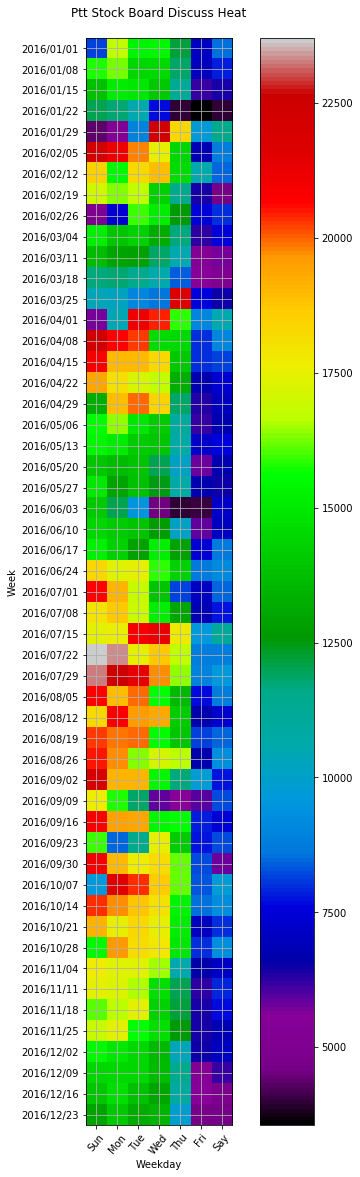

In [117]:
plot = np.array(plot).reshape(52,7)
x = [0,1,2,3,4,5,6]
xlabel = ['Sun','Mon','Tue','Wed','Thu','Fri','Say']
y = range(52)
ylabel = []
for i in y:
    lb = datetime.date(2016,1,1)+ datetime.timedelta(days = 7*i)
    lb = lb.strftime("%Y/%m/%d")
    ylabel.append(lb)


plt.figure(figsize=(10,20))
plt.imshow(plot).set_cmap('nipy_spectral')

plt.xticks(x,xlabel,rotation=50)
plt.yticks(y,ylabel)
plt.title('Ptt Stock Board Discuss Heat\n')
plt.xlabel('Weekday')
plt.ylabel('Week')

plt.grid(True)
plt.colorbar()
plt.show()
